Manual Logistic Regression:
Accuracy: 0.98
Precision: 0.96
Recall: 1.00
F1 Score: 0.98

Scikit-learn Logistic Regression:
Accuracy: 0.99
Precision: 0.98
Recall: 1.00
F1 Score: 0.99



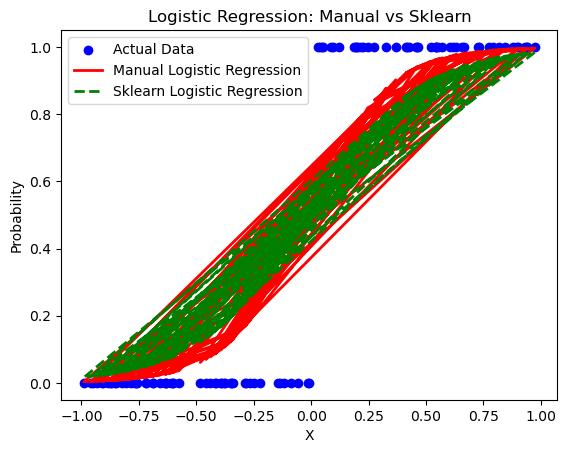

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.special import expit

# Generating synthetic dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1) - 1
y = (X > 0).astype(int).ravel()  # Labels: 1 if X > 0, else 0

# Manual Logistic Regression Implementation
def sigmoid(z):
    return expit(z)

def compute_cost(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def logistic_regression_manual(X, y, lr=0.1, epochs=1000):
    m = X.shape[0]
    X_bias = np.c_[np.ones((m, 1)), X]  # Adding bias term
    theta = np.zeros(X_bias.shape[1])
    
    for _ in range(epochs):
        y_pred = sigmoid(np.dot(X_bias, theta))
        gradient = np.dot(X_bias.T, (y_pred - y)) / m
        theta -= lr * gradient
    
    return theta

# Training manual logistic regression
theta_manual = logistic_regression_manual(X, y)
X_bias = np.c_[np.ones((X.shape[0], 1)), X]
y_pred_manual_prob = sigmoid(np.dot(X_bias, theta_manual))
y_pred_manual = (y_pred_manual_prob >= 0.5).astype(int)

# Scikit-learn Logistic Regression Model
model = LogisticRegression()
model.fit(X, y)
y_pred_sklearn = model.predict(X)

# Computing error metrics
def compute_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")

# Printing results
compute_metrics(y, y_pred_manual, "Manual Logistic Regression")
compute_metrics(y, y_pred_sklearn, "Scikit-learn Logistic Regression")

# Plotting results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred_manual_prob, color='red', linewidth=2, label='Manual Logistic Regression')
plt.plot(X, model.predict_proba(X)[:, 1], color='green', linestyle='dashed', linewidth=2, label='Sklearn Logistic Regression')
plt.xlabel("X")
plt.ylabel("Probability")
plt.legend()
plt.title("Logistic Regression: Manual vs Sklearn")
plt.show()


## Manual Logistic Regression Implementation - Explanation

### 1. Sigmoid Function
```python
# Sigmoid function
def sigmoid(z):
    return expit(z)
```
#### What does it do?
- The **sigmoid function** (also called the logistic function) maps any real number to a range between 0 and 1.
- It is used in logistic regression to model probabilities.

#### Mathematical Formula:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
where:
- \( z \) is the input value (linear combination of features and weights).
- \( e \) is Euler’s number (≈2.718).

#### Why use `expit(z)`?
- `expit(z)` (from `scipy.special`) is a numerically stable version of the sigmoid function.
- Prevents **overflow errors** when \( z \) is very large or small.

---

### 2. Compute Cost Function
```python
# Compute the cost function
def compute_cost(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
```
#### What does it do?
- Computes the **log loss (cross-entropy loss)**, which is the cost function for logistic regression.

#### Mathematical Formula:
$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$
where:
- \( J(\theta) \) is the cost function (error measure).
- \( m \) is the number of samples.
- \( y^{(i)} \) is the actual class (0 or 1).
- \( \hat{y}^{(i)} \) (y_pred) is the predicted probability.

#### Why use log loss?
- It works well for **binary classification** problems.
- Using **Mean Squared Error (MSE)** would make optimization harder due to a non-convex cost function.

---

### 3. Manual Logistic Regression Training
```python
# Logistic Regression Training Function
def logistic_regression_manual(X, y, lr=0.1, epochs=1000):
    m = X.shape[0]
    X_bias = np.c_[np.ones((m, 1)), X]  # Adding bias term
    theta = np.zeros(X_bias.shape[1])
    
    for _ in range(epochs):
        y_pred = sigmoid(np.dot(X_bias, theta))
        gradient = np.dot(X_bias.T, (y_pred - y)) / m
        theta -= lr * gradient
    
    return theta
```
#### Step-by-step breakdown:
1. **Initialize parameters:**
   ```python
   m = X.shape[0]
   X_bias = np.c_[np.ones((m, 1)), X]  # Adding bias term
   theta = np.zeros(X_bias.shape[1])
   ```
   - \( m \) is the number of training samples.
   - Adds a **bias term** (column of ones) to the dataset.
   - Initializes \( \theta \) to zeros.

2. **Gradient Descent Optimization:**
   ```python
   for _ in range(epochs):
       y_pred = sigmoid(np.dot(X_bias, theta))
       gradient = np.dot(X_bias.T, (y_pred - y)) / m
       theta -= lr * gradient
   ```
   - **Predictions:** Computes \( \hat{y} \) using the **sigmoid function**.
   - **Compute Gradient:**
     $$
     \frac{1}{m} X^T (y_{\text{pred}} - y)
     $$
     - Calculates how much to adjust each \( \theta \).
   - **Update Parameters:**
     $$
     \theta = \theta - \alpha \times \text{gradient}
     $$
     - Moves \( \theta \) in the direction that minimizes the cost function.

3. **Returns the optimized weights:**
   ```python
   return theta
   ```
   - After `epochs` iterations, it returns the learned \( \theta \).

---

### Summary
1. `logistic_regression_manual` initializes and trains the model using **Gradient Descent**.
2. **Each iteration:**
   - Computes predictions using the **sigmoid function**.
   - Computes **gradient**.
   - Updates **theta**.
3. **Final model:** Can predict classes:
   - If \( \sigma(z) \geq 0.5 \), classify as **1**.
   - Otherwise, classify as **0**.

---

### Why is This Important?
- Understands the mechanics behind `LogisticRegression` in **Scikit-learn**.
- Useful for **custom implementations**.
- Forms the foundation for **Neural Networks** in deep learning.

---
**Let me know if you need further clarifications! 🚀**

